# <span style="color:#F72585">Aprendizaje no supervisado</span>


```{admonition} Nota
:class: 
Los trozos de código de esta página son de R. Por favor, ejecútelos en Colab o Binder
```

## <span style="color:#4361EE">Introducción</span>

En el aprendizaje no supervisado se tienen tablas de datos donde no hay una variable de respuesta. Lo que se busca es "entender" los datos, buscar patrones de comportamiento en ellos, describir y explorar lo que está oculto. En el aprendizaje se mencionan como técnicas de visualización. En Estadística se habla de un área de ella, la descriptiva: univariada, bivariada y multivarida. Los índices estadísticos complementan a los gráficos. Los gráficos son más fáciles de comprender por nuestro cerebro y esa es la razón de que se busquen representaciones y resúmenes gráficos.

Para entender la información que emerge de los datos, es necesario conocer el contexto del entorno del que los datos forman parte: metainformación. La metainformación más próxima a los datos puestos en una tabla, está en los nombres de las filas y columnas. En las filas generalmente, se ponen las unidades estadísticas, claramente definidas en el estudio que está desarrollando. Usamos el nombre genérico de individuos para esas unidades estadísticas. En los datos más estructurados, las columnas suelen ser las variables o características que queremos observar.

Visualizar, entender, describir, explorar los datos, es también útil, antes de abordar modelos de aprendizaje supervisado. Entender la realidad a través de los datos ayuda a selecciones mejor los modelos y podrían ayudar a llegar a los modelos adecuados de forma más rápida.

Las tablas de datos de individuos por variables continuas se conocen como matrices en el Álgebra lineal, el área de las matemáticas que nos sirve para ver las tablas como puntos en es representaciones geométricas multidimensionales. En lugar de tratar de entender la tabla de datos (digital) observamos su representación gráfica (analógica). 

Se suelen utilizar letras mayúsculas para representar a las matrices. Las tablas de individuos, usaremos *n* para indicar el número de filas (individuos) y *p* para el número de variables. Si denotamos por **Y** la matriz, tiene dimensiones *n* por *p*, es decir *n* individuos. Se suelen utilizar los subíndices *i* y *j* para recorrer filas y columnas.



<center>
<img src="https://miro.medium.com/max/1200/1*e2MXyQCS28jQghVLZumLsA.png" alt="Matriz" width="250" height="350">
<center>

Fuente: [Medium](https://miro.medium.com/max/1200/1*e2MXyQCS28jQghVLZumLsA.png)

La representación de una matriz de números reales (variables continuas) y su visualización mediante proyecciones da origen al método de análisis en componentes principales. Esta representación hace uso de una parte del Álgebra lineal, que se puede denominar: espacios vectoriales con producto interno. El producto interno que se define haciendo uso de una matriz cuadrada, simétrica y definida positiva, por las condiciones que debe cumplir. La más sencilla es la matriz identidad, como es cuadrada, el número de filas es igual al número de columnas, y es el orden de la matriz.

La geometría de nuestra vida diaria está en 3 dimensiones y la matriz que define el producto interno es **I**$_3$:

In [1]:
I=diag(3); I

1,0,0
0,1,0
0,0,1


De la matriz de métrica se derivan: normas, distancias, proyecciones, ángulos. Para la matriz **Y** se tienen dos representaciones que denominamos nubes de puntos y denotamos por *N* con un subíndice para tener el número de puntos que hay en la nube. Para la tabla **Y** ($n\times p$) tenemos la nube de filas o individuos *N*$_n$, en $\mathbb{R}^p$ y la nube de columnas o variables  *N*$_p$, en $\mathbb{R}^n$. Para que los vectores de la representación geométrica de las variables muestren los resúmenes estadísticos de las variables, el espacio vectorial $\mathbb{R}^n$ denota la métrica $\frac{1}{n}\mathbf{I}$. Por ejemplo, si $n=5$ es $\frac{1}{5}\mathbf{I}$:




In [2]:
1/5*diag(5)

0.2,0.0,0.0,0.0,0.0
0.0,0.2,0.0,0.0,0.0
0.0,0.0,0.2,0.0,0.0
0.0,0.0,0.0,0.2,0.0
0.0,0.0,0.0,0.0,0.2


La generalización del ACP, utilizando otras métricas y transformando previamente las tablas que se desean explorar, permite tener imágenes geométricas para: tablas de contingencia, frecuencias y otras de números positivos (Análisis de correspondencias simples); y para tablas de individuos por variables cualitativas (Análisis de correspondencias múltiples). A continuación se muestras un esquema de esos tres métodos factoriales o en ejes principales:

<center>
<img src="https://github.com/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%2014-%20Aprendizaje%20no%20Supervisado/Imagenes/metodosFactoriales.png?raw=true" alt="Primera imagen" width="600" height="700">
<center>

Lo que muestra la figura es la proyección de nubes de puntos que están en muchas dimensiones en planos. Si partimos de un espacio de 100 dimensiones podemos hacer una primera lectura en el mejor plano, es decir en el que menos se deforman las longitudes o normas de los vectores, que equivale a que se pierde menos de las longitudes de los vectores. Seguramente un plano no es suficiente y hay que decidir  cuál es  la dimensión del subespacio *S* que se va a observar. Si decidimos observar en $S=5$ dimensiones es subespacio es $\mathbb{R}^5$ y tampoco lo puedo ver y tendríamos que leer varios planos. El primero formado por los nuevos ejes 1 y 2 es el mejor plano y en principio debería observar las 10 parejas de planos.

Otra manera de resumir la información es hacer una partición: grupos o clases disyuntos y cuya unión es el conjunto de todos los datos. Aquí aprovechamos las representaciones geométricas de los métodos factoriales. Entonces se trata de buscar grupos geométricamente, los métodos que se asocian a esa búsqueda son el $K{-}means$, algoritmo que busca una partición directa. Tiene ventajas pero tiene dos problemas: hay que darle al algoritmo el número de clases *K* y ese número que queremos decidir a partir de la estructura de los datos; y generalmente converge a un óptimo local y no global, es decir que la partición en $K$ clases depende de los puntos iniciales. Entonces se usa el método de Ward, de clasificación ascendente jerárquica aglomerativa, como una manera de solucionar esos dos problemas. Estos métodos se tratan de clasificación no supervisada o agrupamiento, en inglés se conocen como *Cluster Analysis*. Los algoritmos de clasificación ascendente jerárquica aglomerativa parte de los *n* individuos, se unen los dos más cercanos para formar un grupo y se tiene una partición de $n-1$ grupos: uno de dos individuos y $n-2$ de uno. El grupo formado pasa a jugar el papel de un individuo, de modo que se sigue el procedimiento hasta llegar a un solo grupos de $n$ individuos. Este proceso se puede ver como un árbol y de su observación podemos decidir sobre una o más particiones. Una partición se obtiene al cortar el árbol lo que origina *K* ramas separadas, que corresponden a las clases. Los dos problemas de este segundo tipo de métodos son: su consumo de recursos de cómputo y la restricción de anidamiento de las particiones. En la figura se muestra un árbol pequeño. 


<center>
<img src="https://miro.medium.com/max/1280/1*eqLUPz6vkWmomJKJ9mX2SA.gif" alt="k-means" width="400" height="500">
<center>

Fuente[Medium](https://miro.medium.com/max/1280/1*eqLUPz6vkWmomJKJ9mX2SA.gif)

Cuando el número de individuos es muy grande, se realiza $K{-}means$ para obtener una partición en miles de clases, que entrarán al método de Ward. Para el segundo problema se realiza una optimización o consolidación de la partición obtenida con el $K{-}means$. Nótese que el método de Ward provee una manera de solucionar los dos problemas del $K{-}means$: provee el número *K* de clases y los puntos iniciales. A su vez el $K{-}means$ provee  una solución a los problemas del método de Ward: la saturación del sistema de cómputo y la restricción de anidamiento de la partición. 


In [3]:
data(iris)
hcl <- hclust(dist(iris[,-5]),method="ward.D2")

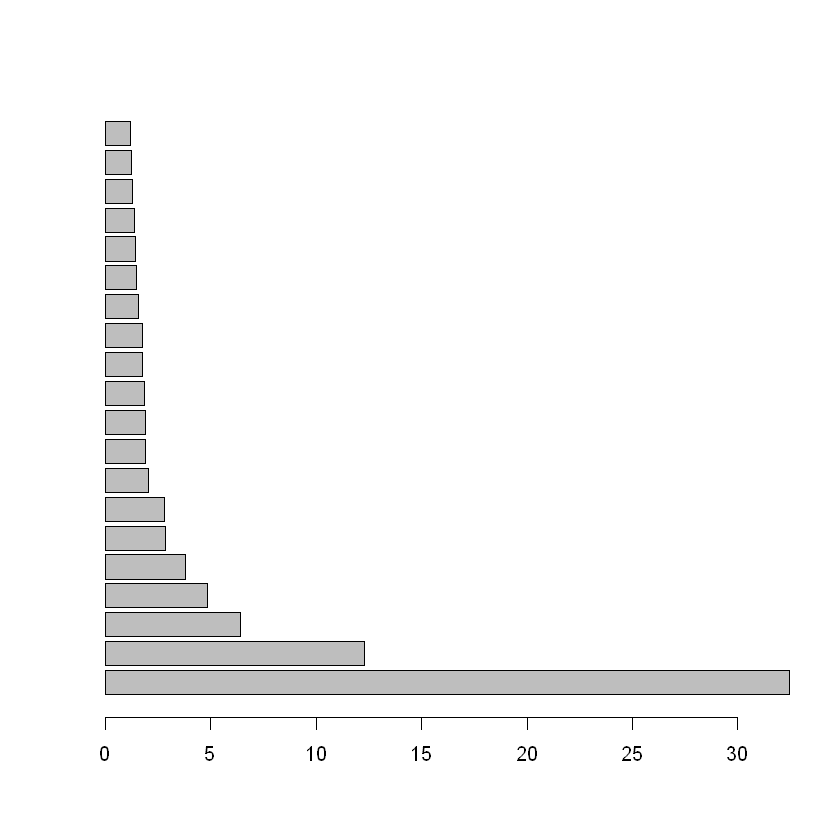

In [4]:
barplot(hcl$height[149:130],horiz=TRUE) 

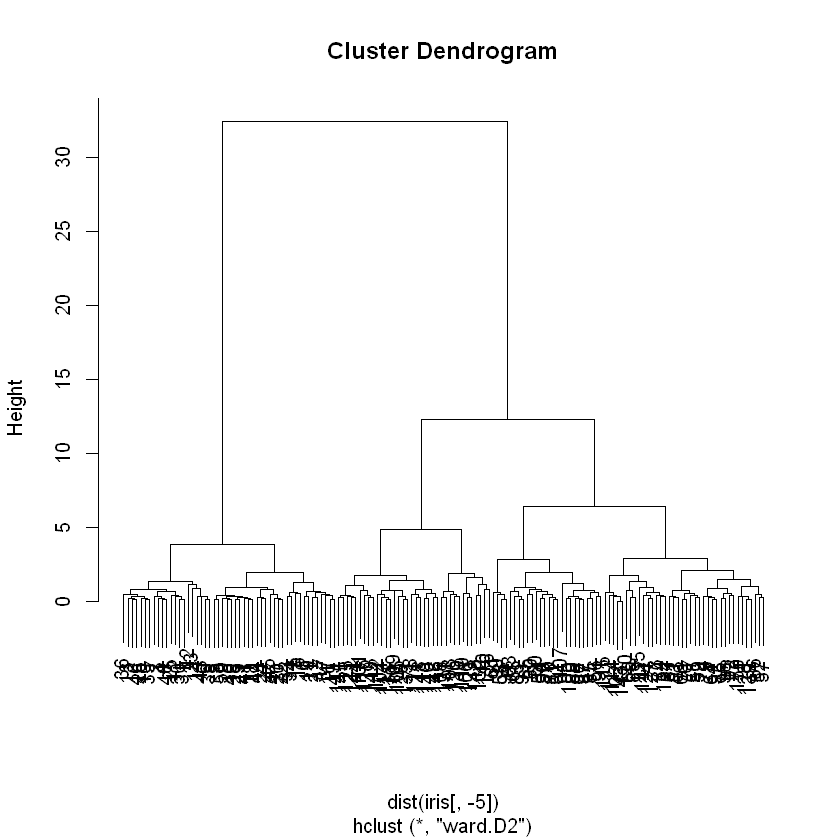

In [5]:
plot(hcl)

En el libro Estadística descriptiva multivariada, se explican estos métodos. Se puede bajar de la página de la Facultad de Ciencias, en este [link](http://ciencias.bogota.unal.edu.co/fileadmin/Facultad_de_Ciencias/Publicaciones/Imagenes/Portadas_Libros/Estadistica/Estadistica_descriptiva_multivariada/libroEstadisiticaDescriptivaMultivariadaDigital.pdf).

## <span style="color:#4361EE">Descripción bivariada simultánea</span>


Estoy llamando Descripción univariada simultánea cuando observamos a la vez las descripciones bivariadas da varias parejas de variables. Para hacerlo las variables según las escalas de medida se dividen solo en dos tipos: cualitativas (nominales e ordinales) y continuas (de intervalo de razón). Entonces, se tienen tres tipos de parejas de variables:

1. Dos continuas.

2. Una cualitativa y una continua.

3. Dos cualitativas.

En estas descripciones se privilegian las descripciones gráficas.

### <span style="color:#4CC9F0">Descripción bivariada de varias parejas de variables continuas</span>


En FactoClass hemos programado la función *plotpairs* que enriquece la función *pairs* de R, dejando los diagramas de dispersión en la parte triangular inferior del panel de gráficas, en la parte triangular superior se grafican curvas de nivel de densidades kernel bivariadas, y el panel de la diagonal se utiliza para dibujar las densidades kernel de las marginales.

Vamos a utilizarla para ver las seis parejas de las cuatro variables. En el Colab no está disponible el paquete FactoClass, por lo tanto tenemos que instalarlo:


In [6]:
#install.packages("FactoClass")

Para hacer disponibles sus funciones hay que cargarla:

In [7]:
library(FactoClass)


Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



Ahora sí la gráfica:

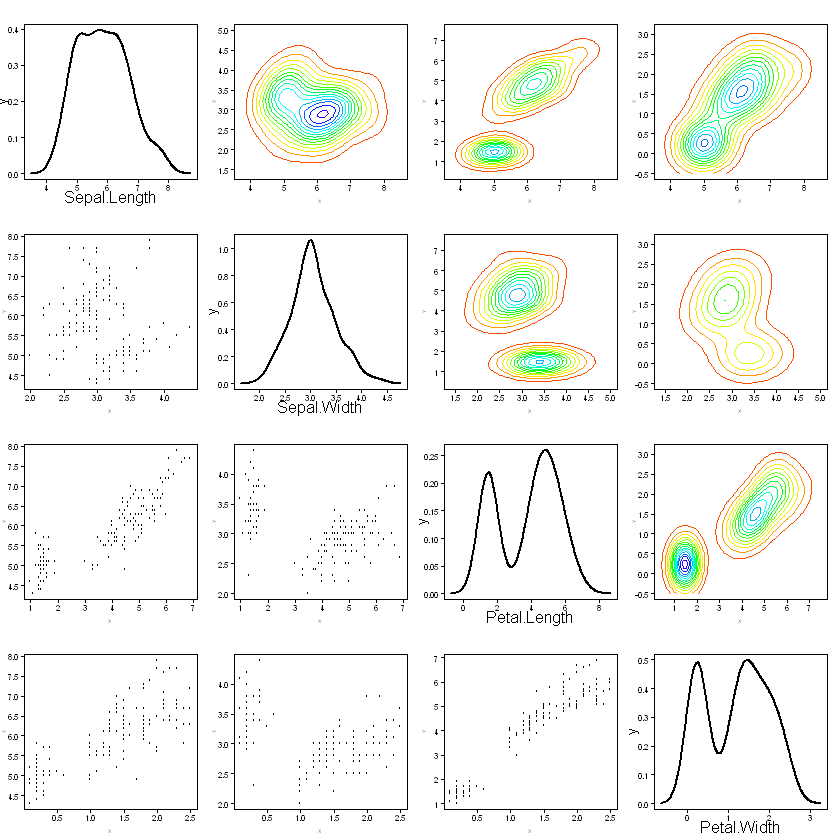

In [8]:
data(iris)
plotpairs(iris[,1:4])

En este panel de gráficas podemos explorar la existencia de grupos. Vemos claramente dos grupos en todos los diagramas de dispersión y una separaciones claras,  en los contornos de las densidades kernel, cuando una de las variables es la longitud del pétalo. Las variables longitud y ancho del pétalo son las que mejor separan entre los dos grupos.

En el ejemplo iris se conocen que las flores son de tres especies y podemos explorar su separación identificando la pertenencia a las clases con símbolos y colores. La función *plomatrix* del paquete *amun* programado por tres estudiantes de algún curso Análisis multivariado de la Carrera de Estadística, lo hace. Sin embargo no está en el CRAN y la voy a utilizar desde mi consola de R:

**Ejecutar desde consola**


Las gráficas se pueden complementar con las matriz de varianzas y covarianzas; y la de correlaciones:

In [9]:
round(var(iris[,-5]),2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.69,-0.04,1.27,0.52
Sepal.Width,-0.04,0.19,-0.33,-0.12
Petal.Length,1.27,-0.33,3.12,1.30
Petal.Width,0.52,-0.12,1.30,0.58


In [10]:
as.dist(round(cor(iris[,-5]),2))


             Sepal.Length Sepal.Width Petal.Length
Sepal.Width         -0.12                         
Petal.Length         0.87       -0.43             
Petal.Width          0.82       -0.37         0.96

### <span style="color:#4CC9F0">Descripción bivariada de una variable cualitativa y varias continuas</span>

Una variable cualitativa representa una partición del conjunto de individuos. Un boxplot puede comparar los grupos según una variable cualitativa. En el ejemplo iris veamos los boxplot de las tres especies para la longitud del pétalo.

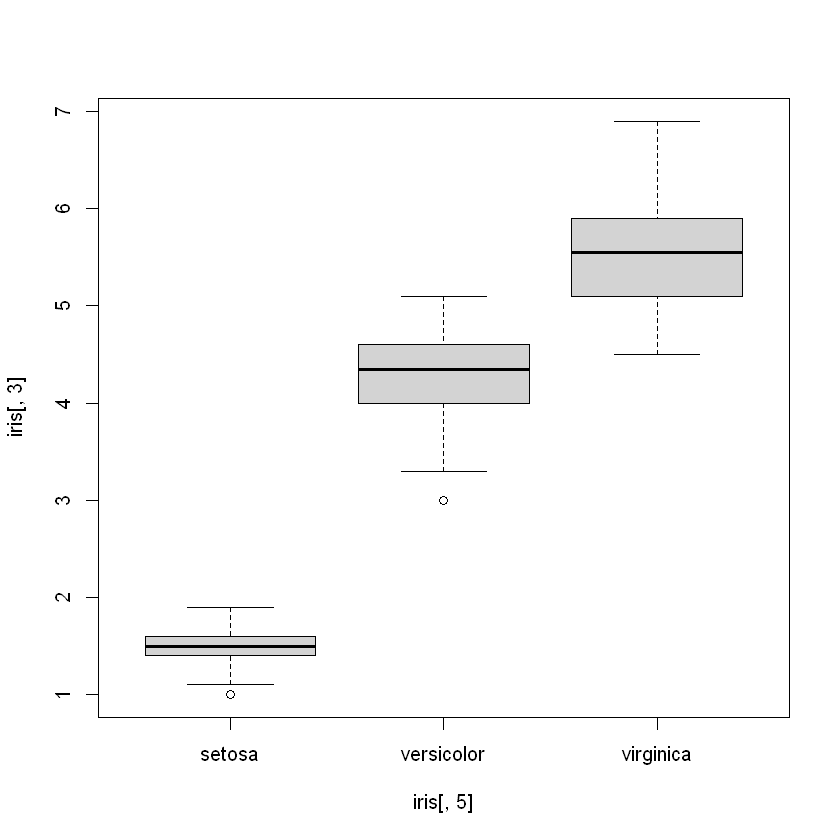

In [11]:
boxplot(iris[,3]~iris[,5])

La asociación de una variable cualitativa y otra continua se puede resumir con la razón de correlación, definida como varianza entre grupos sobre varianza total (ver en el libro). Con la función *centroids{FactoClass}* calculan las medias y las razones de correlación de las tres especies.

In [12]:
centroids(iris[,-5],iris[,5])

$centroids
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

$weights
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

$cr
     Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]    0.6187057   0.4007828    0.9413717   0.9288829

Finalmente con la función *cluster.carac{FactoClass)* se pueden observar las variables que más caracterizan a cada una de las tres especies.

In [13]:
cluster.carac(iris[,-5],iris[,5],tipo.v="co")

class: setosa
             Test.Value Class.Mean Frequency Global.Mean
Sepal.Width       7.365      3.428        50       3.057
Sepal.Length     -8.757      5.006        50       5.843
Petal.Width     -10.831      0.246        50       1.199
Petal.Length    -11.264      1.462        50       3.758
------------------------------------------------------------ 
class: versicolor
             Test.Value Class.Mean Frequency Global.Mean
Petal.Length      2.463       4.26        50       3.758
Sepal.Width      -5.709       2.77        50       3.057
------------------------------------------------------------ 
class: virginica
             Test.Value Class.Mean Frequency Global.Mean
Petal.Width       9.392      2.026        50       1.199
Petal.Length      8.801      5.552        50       3.758
Sepal.Length      7.788      6.588        50       5.843

### <span style="color:#4CC9F0">Descripción bivariada de una variable cualitativa por varias nominales</span>


La asociación entre dos variables cualitativas se puede observar gráficamente con los perfiles fila y columna, derivados de la tabla de contingencia. Podemos utilizar el ejemplo del libro para observar la asociación entre las carreras y la edad. La función *plotct{FactoClass}* permite hacerlo: 


In [14]:
data(admi)
names(admi)
K<-unclass(table(admi$carr,admi$edad)) # tabla de contingencia como matriz
addmargins(K)


[1] "carr" "mate" "cien" "soci" "text" "imag" "exam" "gene" "estr" "orig"
[11] "edad" "niLE" "niMa" "stra" "age"

,a16m,a17,a18,a19M,Sum
Biol,15,27,9,12,63
Esta,18,28,5,15,66
Farm,18,26,15,14,73
Fisi,21,34,12,15,82
Geol,11,25,2,7,45
Mate,11,14,5,23,53
Quim,24,17,8,14,63
Sum,118,171,56,100,445


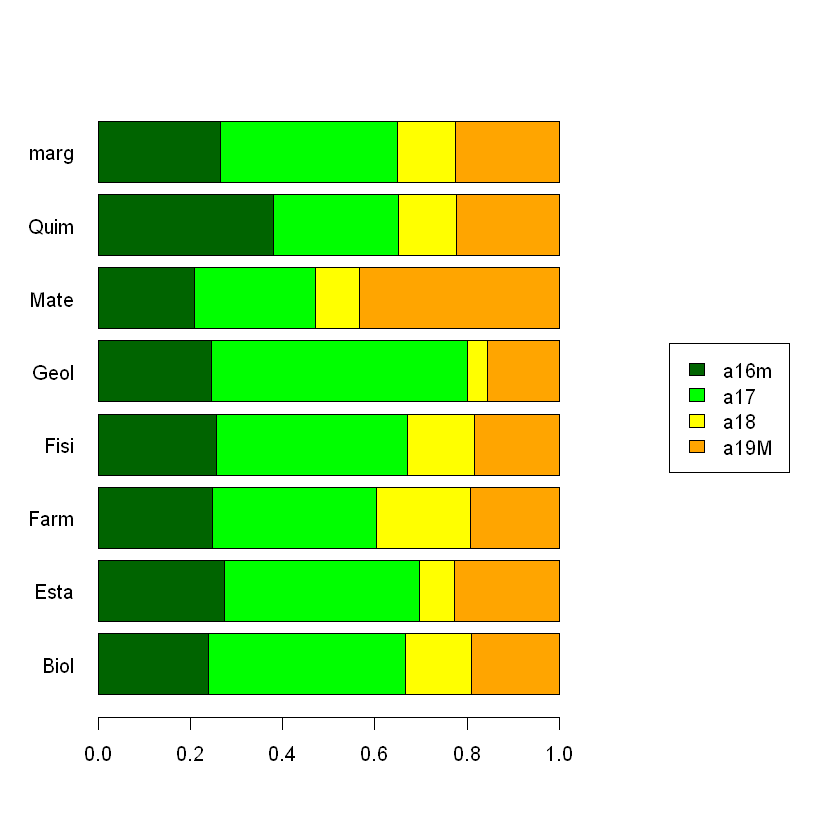

In [15]:
plotct(K,"row",col=c("darkgreen","green","yellow","orange"))

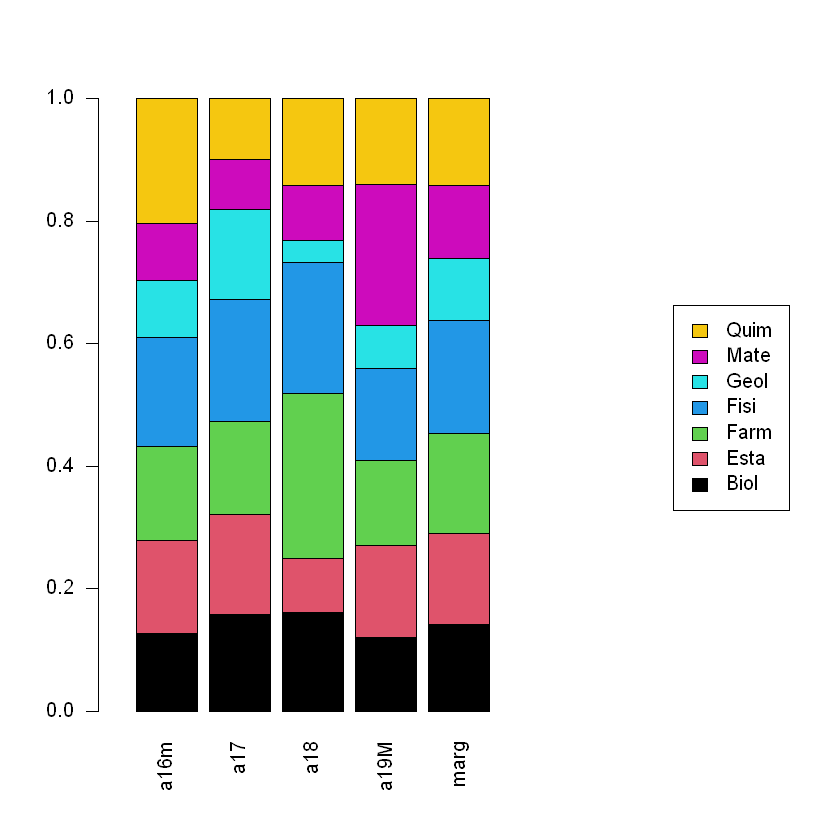

In [16]:
 plotct(K,"col",col=1:7)

Para ordenar por las variables sociodemográficas que más caraterizan a las carreras.

In [17]:
chisq.carac(admi[,8:11],admi[,1])

,chi2,dfr,pval,tval,phi2
gene,44.10803,6,7.036257e-08,5.264299,0.09911918
estr,29.19000,12,3.691872e-03,2.679022,0.06559551
edad,33.55344,18,1.429273e-02,2.189157,0.07540098


Finalmente para ordenar por las categorías de las variables sociodemográficas que más caracterizan a las carrera.

In [18]:
cluster.carac(admi[,8:11],admi[,1],tipo.v="nomi")


class: Biol
[1] Test.Value p.Value    Class.Cat  Cat.Class  Global     Weight    
<0 rows> (or 0-length row.names)
------------------------------------------------------------ 
class: Esta
[1] Test.Value p.Value    Class.Cat  Cat.Class  Global     Weight    
<0 rows> (or 0-length row.names)
------------------------------------------------------------ 
class: Farm
          Test.Value p.Value Class.Cat Cat.Class Global Weight
gene.F         5.152   0.000      31.2      54.8   28.8    128
edad.a18       2.252   0.024      26.8      20.5   12.6     56
estr.alto     -2.281   0.023       8.6       9.6   18.2     81
gene.M        -5.152   0.000      10.4      45.2   71.2    317
------------------------------------------------------------ 
class: Fisi
       Test.Value p.Value Class.Cat Cat.Class Global Weight
gene.M      3.045   0.002      21.8      84.1   71.2    317
gene.F     -3.045   0.002      10.2      15.9   28.8    128
------------------------------------------------------------ 
cla